# **Algorithmic Methods of Data Mining - Winter Semester 2023**

## **Command Line Question (CLQ)**
Using the command line is a feature that Data Scientists must master. It is relevant since the operations there require less memory to use in comparison to other interfaces. It also uses less CPU processing time than other interfaces. In addition, it can be faster and more efficient and handle repetitive tasks quickly.

__Note:__ To answer the question in this section, you must strictly use command line tools. We will reject any other method of response. 

Looking through the files, you can find [series.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries), which contains a list of book series. In each series's <ins>'works'</ins> field, you'll find a list of books that are part of that series. Report the title of the __top 5__ series with the <ins>highest total 'books_count'</ins> among all of their associated books using command line tools. 

1. Write a script to provide this report. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_original.[put_the_proper extension]
2. Try interacting with ChatGPT or any other LLM chatbot tool to implement a <ins>more robust</ins> script implementation. Your final script should be __at most three lines__. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_LLM.[put_the_proper_ extension]. Add in your homework how you employed the LLM chatbot tools, validate if it is correct, and explain how you check its correctness.
   
The expected result is as follows: 

|id|title|total_books_count|
|---|---|---|
|302380|Extraordinary Voyages|20138|
|94209|Alice's Adventures in Wonderland|14280|
|311348|Kolekcja Arcydzieł Literatury Światowe|13774|
|41459|Oz|11519|
|51138|Hercule Poirot|11305|



### **1. Write a script to provide this report**

In [1]:
%%bash
#!/bin/bash
jq '{id: .id|tonumber, title: .title, total_books_count: [.works[].books_count|tonumber]|add}' "dataset/series.json" >> books_count.json
jq -s 'sort_by(.total_books_count)|reverse' books_count.json >> sorted.json 
echo "id,title,total_books_count"
jq -r '.[:5] | .[] | "\(.id),\(.title),\(.total_books_count)"' sorted.json
rm sorted.json books_count.json

id,title,total_books_count
302380,Extraordinary Voyages,20138
94209,Alice's Adventures in Wonderland,14280
311348,Kolekcja Arcydzieł Literatury Światowej,13774
41459,Oz,11519
51138,Hercule Poirot,11305


The script mentioned above is saved as `commandline_original.sh` and is written in shell script. It uses the `jq` JSON parser available in Ubuntu 22.04. A main issue with this script is its dependence on two temporary .json files where we store the necessary dataset. These files are removed once the operations are completed. The first file, `books_count.json`, captures all the books in the series and adds all the `books_count` to the `total_books_count` attribute, so that each entry only has three elements: `id`, `title`, and `total_books_count`. This file is then sorted in reverse to prioritize entries with the highest `total_books_count` at the top. The sorted results are saved in `sorted.json`. Finally, the script outputs the top five JSON objects from `sorted.json` before deleting both `sorted.json` and `books_count.json`.


### **2. Try interacting with ChatGPT or any other LLM chatbot tool to implement a <ins>more robust</ins> script implementation.**

The prompt made to ChatGPT is: "can you make this more robust solution in max 3 lines of script: (script code)"

Result is this: "Certainly, your script's primary function is to process a JSON dataset, sort the entries based on total book count, and print the top 5 entries. We can achieve this in a more concise manner by chaining `jq` commands and avoiding the creation of intermediate files. Here's a more robust solution in three lines:"

In [2]:
%%bash
#!/bin/bash
data=$(jq '{id: .id|tonumber, title: .title, total_books_count: [.works[].books_count|tonumber]|add}' "dataset/series.json")
echo "id,title,total_books_count"
echo "$data" | jq -s 'sort_by(.total_books_count)|reverse|.[:5] | .[] | "\(.id),\(.title),\(.total_books_count)"' -r

id,title,total_books_count
302380,Extraordinary Voyages,20138
94209,Alice's Adventures in Wonderland,14280
311348,Kolekcja Arcydzieł Literatury Światowej,13774
41459,Oz,11519
51138,Hercule Poirot,11305


The script mentioned above is saved as `commandline_LLM.sh` and is written in shell script. From ChatGPT we have a explanation for the script:
1. The first line declares the shebang to denote it's a bash script.
2. The second line processes the "dataset/series.json" file and computes the required fields, storing the output in the data variable.
3. The third line first prints the headers and then processes the data variable to sort by total books count in descending order, fetch the top 5 records, and print them in the desired CSV format.

To validate the correctness, we can compare the output from this script with the output from original script. If both the outputs match, then the LLM solution works correctly. As we can check with the table with expected result, original script and LLM script, the results match. We can also compare the computation time to check if original script or LLM script is faster:

|# of tries|Execution time original script (s)|Execution time LLM script (s)|
|---|---|---|
|1|8.6|7.7|
|2|8.7|7.5|
|3|8.6|7.5|
|4|8.5|7.8|
|5|8.7|7.6|
|Avg.Time|8.62|7.62|

In the table above, which showcases execution times, we see that the LLM script is 1s faster on average than the original script. This indicates that the LLM script is not only more concise but also more efficient. Below is the screenshot output from the terminal.

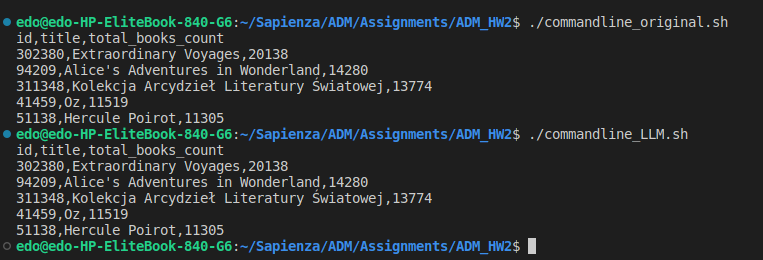